Train different machine learning models for MNIST digit reconition

1. Decision Tree
2. Random Forest
3. Support Vector Machine(SVM)
4. Logistic Regression

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt


In [2]:
# Import dataset
df = pd.read_csv('C:/Users/shiva/Downloads/mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(60000, 785)

In [4]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [5]:
print("Null values in training dataset : ",df.isnull().sum())

Null values in training dataset :  label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


Count the number of classes ie digits from 0-9 to identify any baising toward a class by occurence / frequency 

In [6]:
order = list(np.sort(df['label'].unique()))
print(order)
num =[]
for i in range(0,10):
    num.append(len(df[df['label']==i]))
data = {"Digits" :order, "Count" : num}
df1 =pd.DataFrame(data=data)
df1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Digits,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


Visualization the number of class ie digits and count in the dataset

Text(0.5, 1.0, 'Number of digit classes')

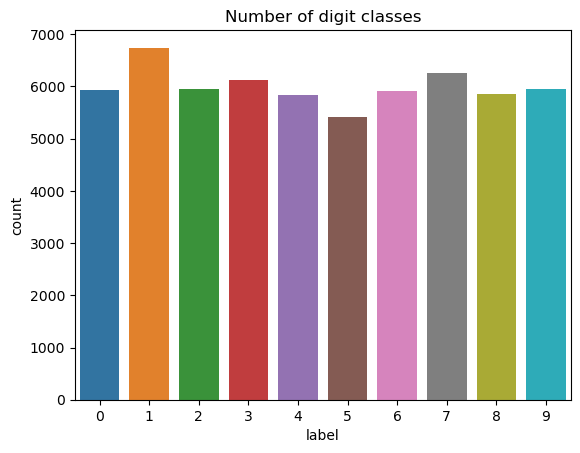

In [7]:
import seaborn as sns
plt.plot(figure = (16,10))
z = sns.countplot(x='label', data=df)
plt.title('Number of digit classes')

Separating the x and y variable (x=feature, y=target)

In [8]:
from timeit import default_timer as timer
start = timer()
x = df.drop(['label'], axis=1)
y = df['label']
print(x.shape)
print(y.shape)
print("Timer:- ",timer() - start)

(60000, 784)
(60000,)
Timer:-  0.09968600003048778


Normalization :- All values lie between 0 and 255 so by dividing all values by 255, they will lie between 0 and 1

In [9]:
x = x/255.0
print('x :',x.shape)

x : (60000, 784)


Feature scalling independent feature variable x

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)

Splitting dataset into training set and test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , stratify=y, random_state =0)

In [13]:
print('Get size of x_train : ',sys.getsizeof(x_train))
print('Get size of x_test : ',sys.getsizeof(x_test))
print('Get size of y_train : ',sys.getsizeof(y_train))
print('Get size of y_test : ',sys.getsizeof(y_test))

Get size of x_train :  301056128
Get size of x_test :  75264128
Get size of y_train :  768032
Get size of y_test :  192032


Train Machine Learning models (Random Forest, Decision Tree, SVM ,Logistic Regression) on MNIST training data

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
def train_mnist_model(x_train,y_train):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0),
        "Decision Tree": DecisionTreeClassifier(criterion="gini",max_depth=3, min_samples_leaf=3,random_state=100),
        "SVM": SVC(kernel="rbf"),
        "Logistic Regression": LogisticRegression(max_iter=100)
    }
    trained_models = {}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[model_name] = model
    return trained_models


Test and evaluate models on MNIST test data

In [61]:
def test_and_evaluate_mnist_model(models,x_test,y_test):
    results = {}
    for model_name, model in models.items():
        y_pred = model.predict(x_test)
        # Evaluate models
        confusionmatrix = confusion_matrix(y_test,y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred,average='macro')
        recall = recall_score(y_test,y_pred,average='macro')
        f1score = f1_score(y_test,y_pred,average='macro')
        classificationReport = classification_report(y_test,y_pred)
        results[model_name] = {
            "Confusion Matrix": confusionmatrix,
            "Accuracy": accuracy,
            "Precision":precision,
            "Recall": recall,
            "F1 Score":f1score,
            "Classification Report": classificationReport
        }
    return results  

In [62]:
trained_models = train_mnist_model(x_train, y_train)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from timeit import default_timer as timer
start = timer()
evaluation_results = test_and_evaluate_mnist_model(trained_models,x_test,y_test)
print("Timer:- ",timer() - start)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

Timer:-  93.77872159983963


Find the model with the highest accuracy

In [64]:
best_model_name = max(evaluation_results, key=lambda model: evaluation_results[model]["Accuracy"])
best_model_accuracy = evaluation_results[best_model_name]["Accuracy"]
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

The best model is SVM with an accuracy of 0.98


# Make a visualization of models

Extract model names and their corresponding evaluation values

In [65]:
model_names = list(evaluation_results.keys())
accuracies = [results["Accuracy"] for results in evaluation_results.values()]
Precisions = [results["Precision"] for results in evaluation_results.values()]
recalls = [results["Recall"] for results in evaluation_results.values()]

Create a bar plot to visualize the accuracy of each model

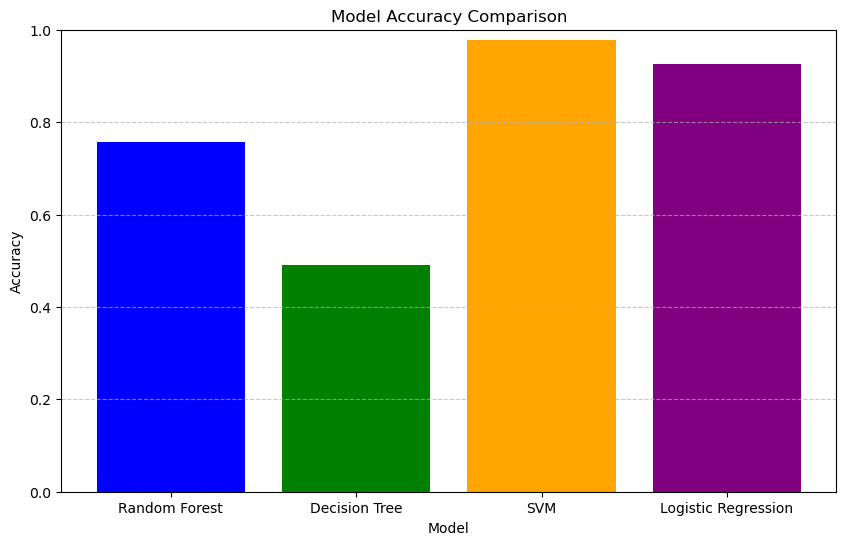

In [68]:
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange','purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.0, 1.0) # set the y-axis limits
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

Create a bar plot to visualize the precision of each model

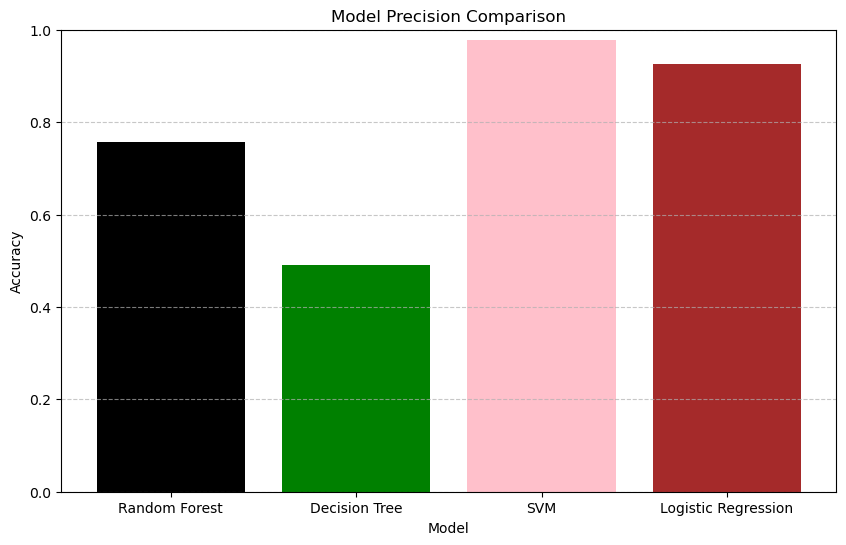

In [77]:
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies,color=['black', 'green', 'pink','brown'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Precision Comparison")
plt.ylim(0.0, 1.0) # set the y-axis limits
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

Create a bar plot to visualize the recall of each model

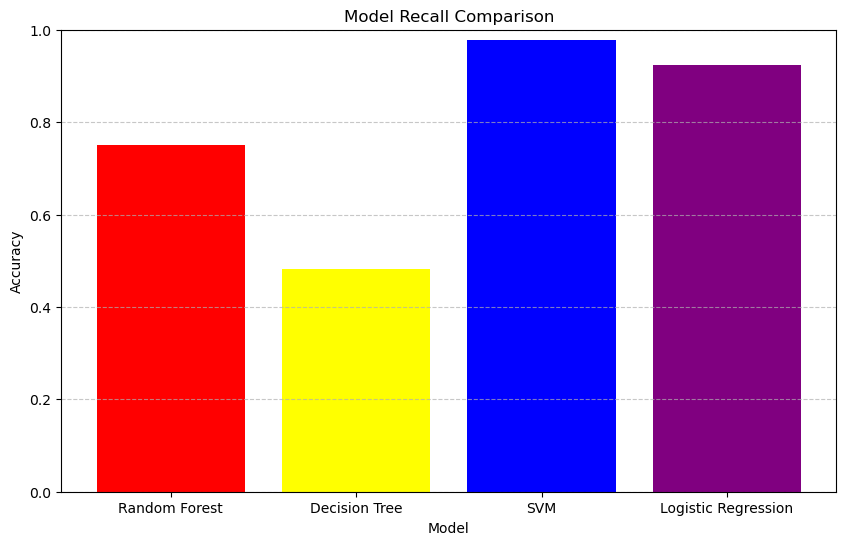

In [73]:
plt.figure(figsize=(10,6))
plt.bar(model_names, recalls,color=['red', 'yellow', 'blue','purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Recall Comparison")
plt.ylim(0.0, 1.0) # set the y-axis limits
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()